**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

import seaborn as sns

from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute',metric = 'euclidean'):
        self.n = n_neighbors
        self.alg = algorithm
        self.metr = metric
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = y.max()
        if(self.alg == 'kd_tree'):
            self.cl = KDTree(X, leaf_size = 10)

    
    def predict(self, X):
        if(self.alg == 'brute'):
            ind = cdist(X, self.X, self.metr).argsort(axis = 1)[:,:self.n]
        if(self.alg == 'kd_tree'):
            dist, ind = self.cl.query(X, k = self.n) 
        vote = np.zeros((X.shape[0], self.classes + 1)) 
        for i in range(X.shape[0]):
            vote[i] = np.array(np.bincount(self.y[ind[i]], minlength = self.classes + 1))
        result = vote.argmax(axis = 1)
        return result
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.07 ms, sys: 877 µs, total: 1.95 ms
Wall time: 1.5 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 108 µs, sys: 24 µs, total: 132 µs
Wall time: 140 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 4.07 ms, sys: 1.96 ms, total: 6.04 ms
Wall time: 4.98 ms


array([2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.78 ms, sys: 1.32 ms, total: 3.09 ms
Wall time: 2.31 ms


array([2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.6 ms, sys: 1.59 ms, total: 3.19 ms
Wall time: 2.32 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 305 µs, sys: 45 µs, total: 350 µs
Wall time: 344 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 3.05 ms, sys: 1.17 ms, total: 4.22 ms
Wall time: 4.1 ms


array([2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.28 ms, sys: 1.39 ms, total: 2.66 ms
Wall time: 2.34 ms


array([2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer = CountVectorizer(min_df=0.02, max_df=0.1, stop_words='english')
vectorizer.fit(data)
X_t = vectorizer.transform(data).toarray()
y_t = target

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
res1=[]
clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

rkf = KFold(n_splits=3)
for train_index, test_index in rkf.split(X_t):
    X_train, X_test = X_t[train_index], X_t[test_index]
    y_train, y_test = y_t[train_index], y_t[test_index]
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    res1.append(accuracy_score(y_test, clf_pred))
        
res1

[0.20334040296924707, 0.19119596923892868, 0.20233359851498275]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
def best_n(X, y , metric = 'euclidean'):
    res = []
    
    for k in range(1,11):
        
        if (metric == 'cosine'):
            clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute',metric = 'cosine')
        else:
            clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
        
        rkf = KFold(n_splits=3)
        for train_index, test_index in rkf.split(X):
            res1= []
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train, y_train)
            clf_pred = clf.predict(X_test)
            res1.append(accuracy_score(y_test, clf_pred))
        res.append(np.asarray(res1).mean())
    return res

In [24]:
score1 = best_n(X_t,y_t)
score2 = best_n(X_t, y_t, metric = 'cosine')

In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.1, stop_words='english')
tfidf_vectorizer.fit(data)
X_t1 = tfidf_vectorizer.transform(data).toarray()

In [26]:
score3 = best_n(X_t1, y_t)
score4 = best_n(X_t1, y_t, metric = 'cosine')

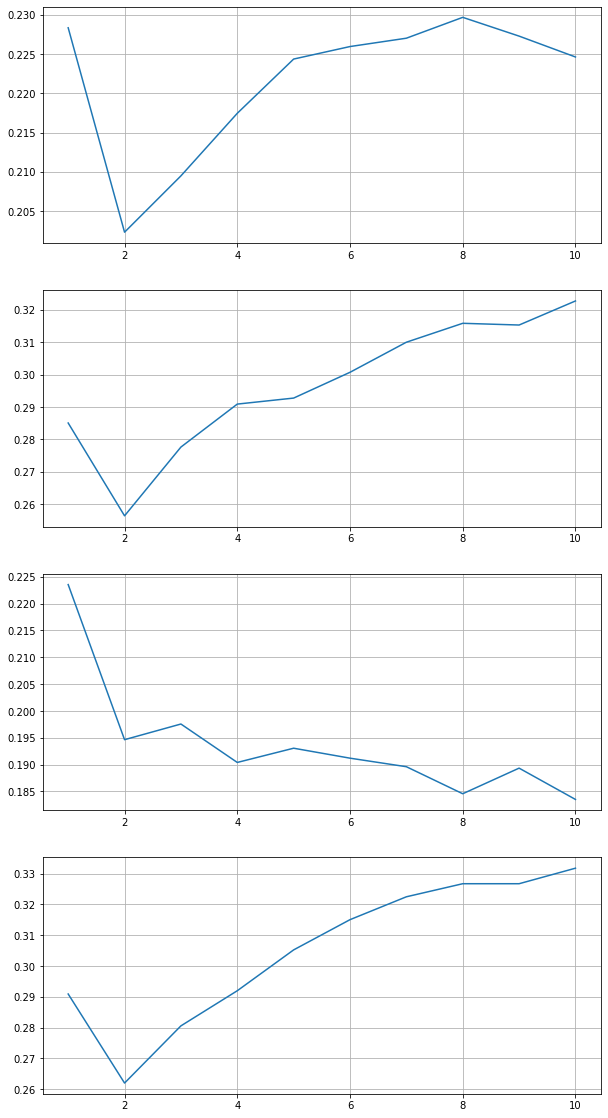

In [27]:
fig = plt.figure(figsize= (10, 20))

ax1 = fig.add_subplot(411)
ax1.grid()
ax1.plot(range(1, 11), score1)

ax2 = fig.add_subplot(412)
ax2.plot(range(1, 11), score2)
ax2.grid()

ax3 = fig.add_subplot(413)
ax3.plot(range(1, 11), score3)
ax3.grid()
    
ax4 = fig.add_subplot(414)
ax4.plot(range(1, 11), score4)
ax4.grid()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [28]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = newsgroups['data']
test_target = newsgroups['target']

In [29]:
X_test = tfidf_vectorizer.transform(test_data).toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [30]:
clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute',metric = 'cosine')
clf.fit(X_t1, y_t)
clf_pred = clf.predict(X_test)
accuracy_score(test_target, clf_pred)

0.29235262878385554

score на тесте немного меньше, чем в кросс-валидации. Мне кажется это из-за разности объемов обучающей выборки.